
# Topic: Voiced / Unvoiced / Background Classification
Objective: Objective: Further classify speech regions into voiced (vowels, nasals), unvoiced (fricatives, plosives), and background noise (non-speech).


Sampling rate: 16kHz, Single channel  
Each member recorded 4 words (yes, yeah, here, present) × 10 times = 40 WAV files per person


# Related Works

Speech processing involves distinguishing between voiced, unvoiced, and silence regions to support speech recognition, speaker identification, and speech synthesis.

**Related research:**
- R. Vergin & D. O'Shaughnessy (1995): proposed Energy and Zero-Crossing Rate (ZCR) for voiced/unvoiced/silence classification.
- Tomi Kinnunen & Haizhou Li (2009): provided a tutorial on MFCCs, the standard feature extraction method for speech.
- D.A. Reynolds (2002): described the complete pipeline for speaker recognition using statistical models.
- Ben Gold & Nelson Morgan (2000): explained energy, spectral, and cepstral features in detail.

# Problem Definition

**Objective:**  
Given a speech waveform \( x[n] \), classify each short-time frame into one of three categories:
- **Voiced** — periodic vibrations of the vocal folds  
- **Unvoiced** — noise-like aperiodic sounds  
- **Background** — silence or non-speech noise

**Input:**
- Type: numpy.ndarray  
- Shape: (n_samples,)  
- Sampling rate: 16000 Hz  
- Format: mono 16-bit WAV

**Output:**
A list of labeled frames:
```python
[
    {"frame_id": 0, "time": 0.00, "label": "voiced", "confidence": 0.91},
    {"frame_id": 1, "time": 0.02, "label": "unvoiced", "confidence": 0.87},
]


# Libraries


In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import glob

# Data Visulization

In [16]:
MEMBER_IDS = {
    "LeNguyenTuanAnh": "522K0021",
    "TranQuangThai": "522K0037",
    "LuongBinhMinh": "522K0024"
}

def visualize_audio_files(word, data_path="../data", n_cols=5, figsize_multiplier=3):
    all_signals = {}
    
    for member_name, member_id in MEMBER_IDS.items():
        member_files = sorted(glob.glob(f"{data_path}/{word}_*_{member_name}.wav"))
        
        if len(member_files) == 0:
            continue
        
        print(f"\n{'='*50}")
        print(f"{member_id}")
        print(f"{'='*50}")
        print(f"Found {len(member_files)} '{word}' audio files")
        
        n_files = len(member_files)
        n_rows = int(np.ceil(n_files / n_cols))
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, figsize_multiplier*n_rows))
        axes = axes.flatten()
        
        signals = []
        for idx, file_path in enumerate(member_files):
            signal, sr = librosa.load(file_path, sr=16000)
            signals.append(signal)
            
            librosa.display.waveshow(signal, sr=sr, ax=axes[idx])
            file_number = file_path.split('\\')[-1].split('_')[1]
            title = f"{word}_{file_number}"
            axes[idx].set_title(title, fontsize=10)
            axes[idx].set_xlabel("Time (s)", fontsize=8)
            axes[idx].set_ylabel("Amp", fontsize=8)
            axes[idx].tick_params(labelsize=7)
        
        for idx in range(n_files, len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        all_signals[member_id] = signals
        print(f"Processed {len(signals)} files, Sampling rate: {sr} Hz")
    
    return all_signals, sr

## yes


522K0021
Found 10 'yes' audio files


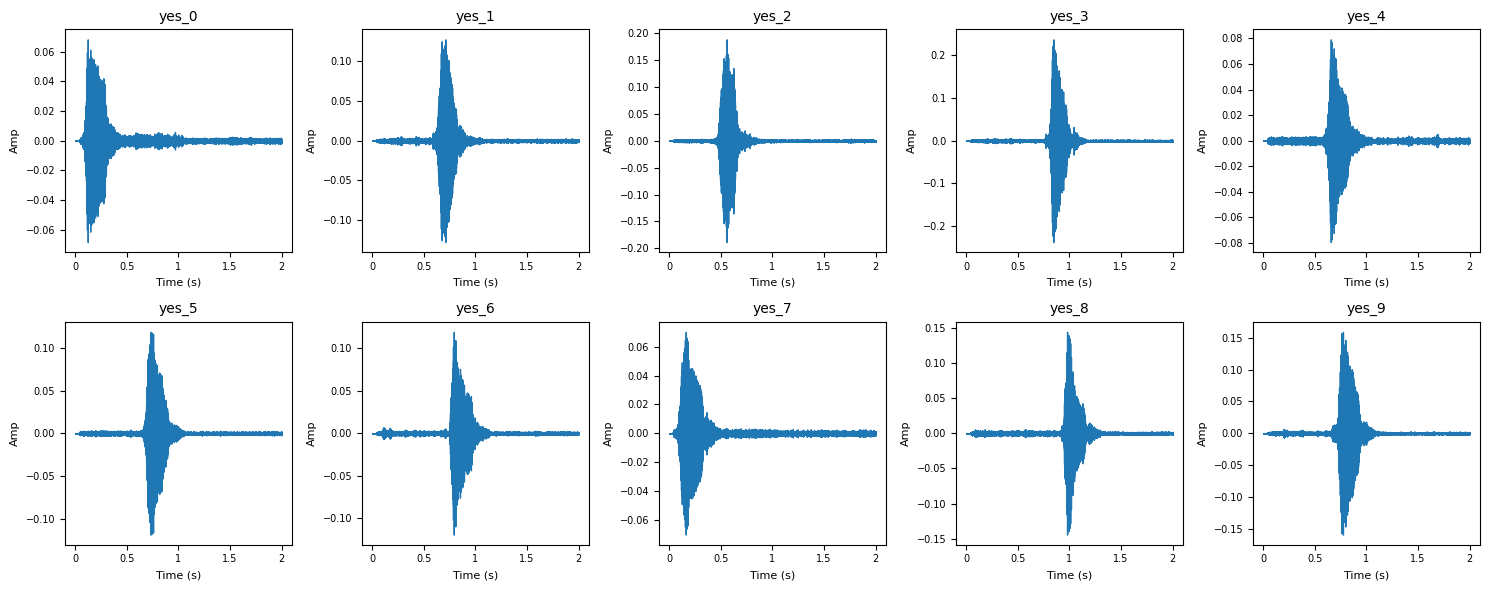

Processed 10 files, Sampling rate: 16000 Hz

522K0037
Found 10 'yes' audio files


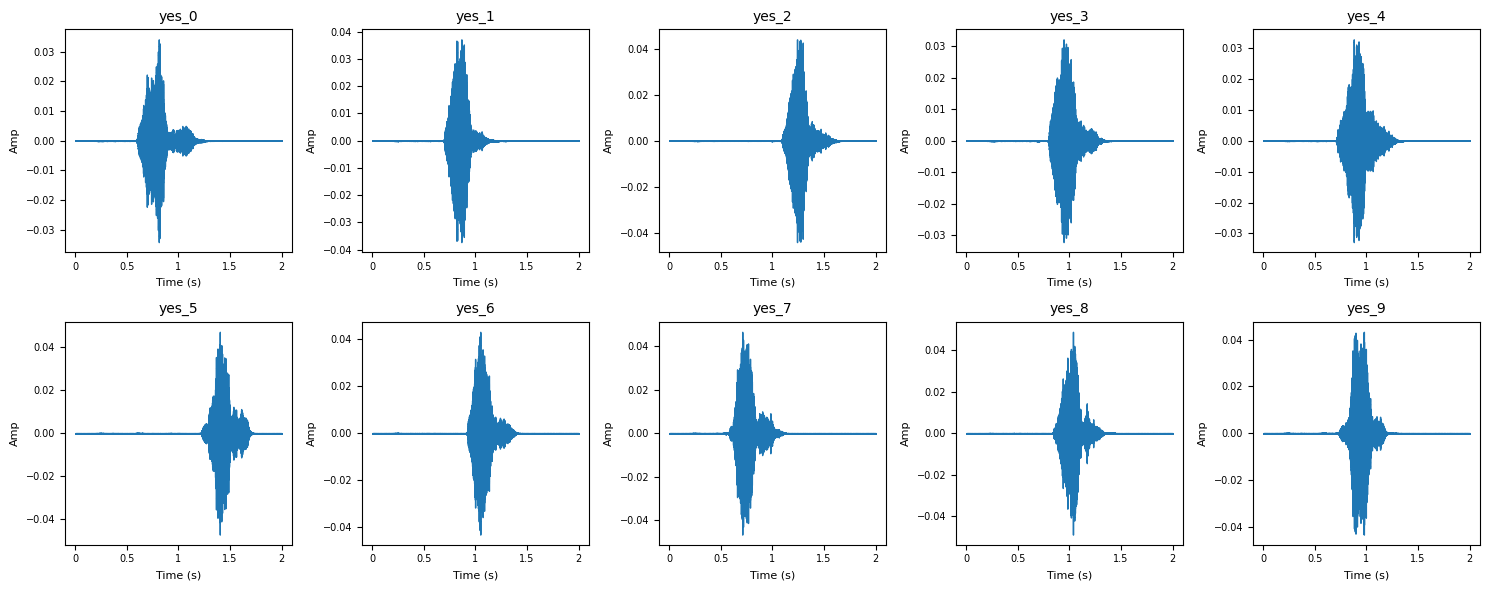

Processed 10 files, Sampling rate: 16000 Hz

522K0024
Found 10 'yes' audio files


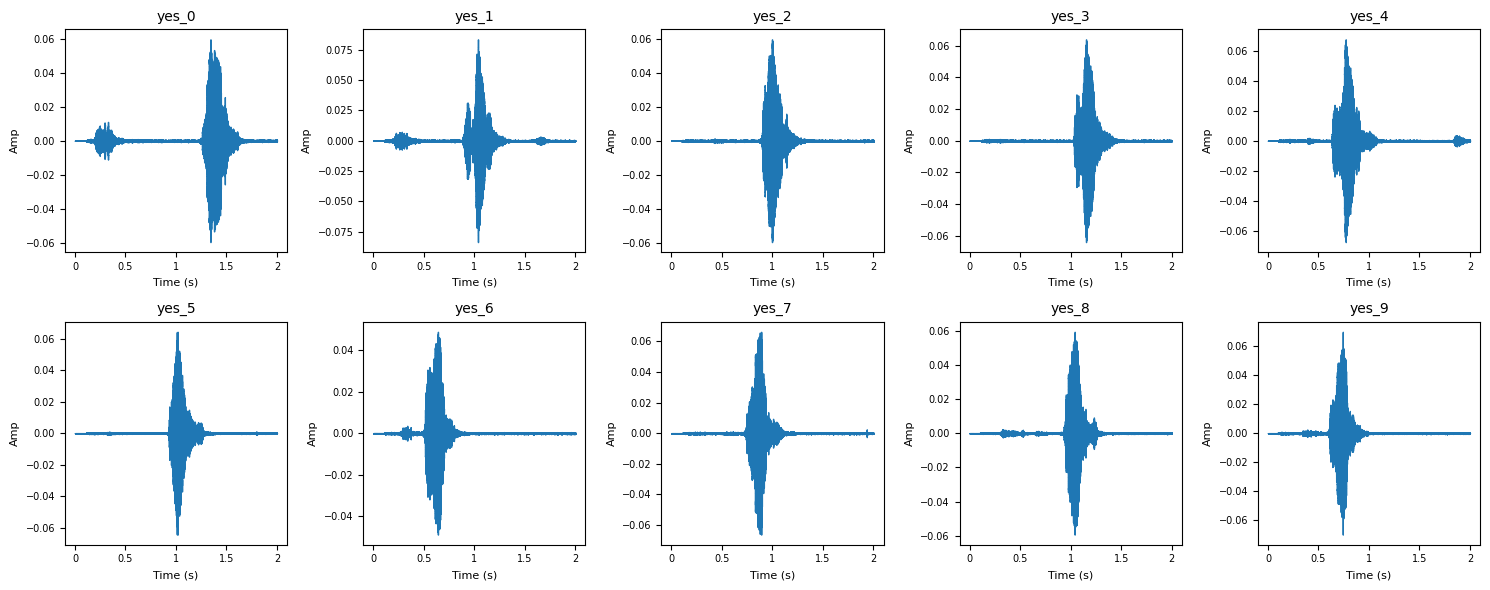

Processed 10 files, Sampling rate: 16000 Hz


In [17]:
yes_signals, sr = visualize_audio_files("yes")

## yeah


522K0021
Found 10 'yeah' audio files


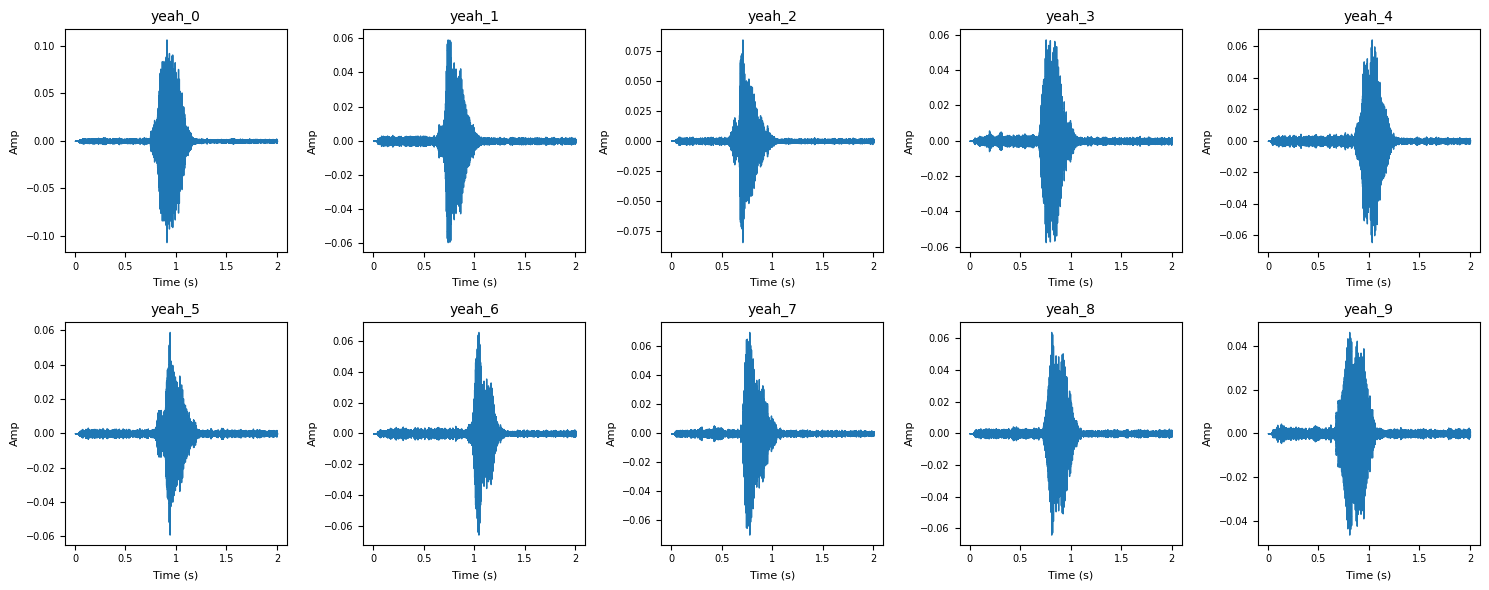

Processed 10 files, Sampling rate: 16000 Hz

522K0037
Found 10 'yeah' audio files


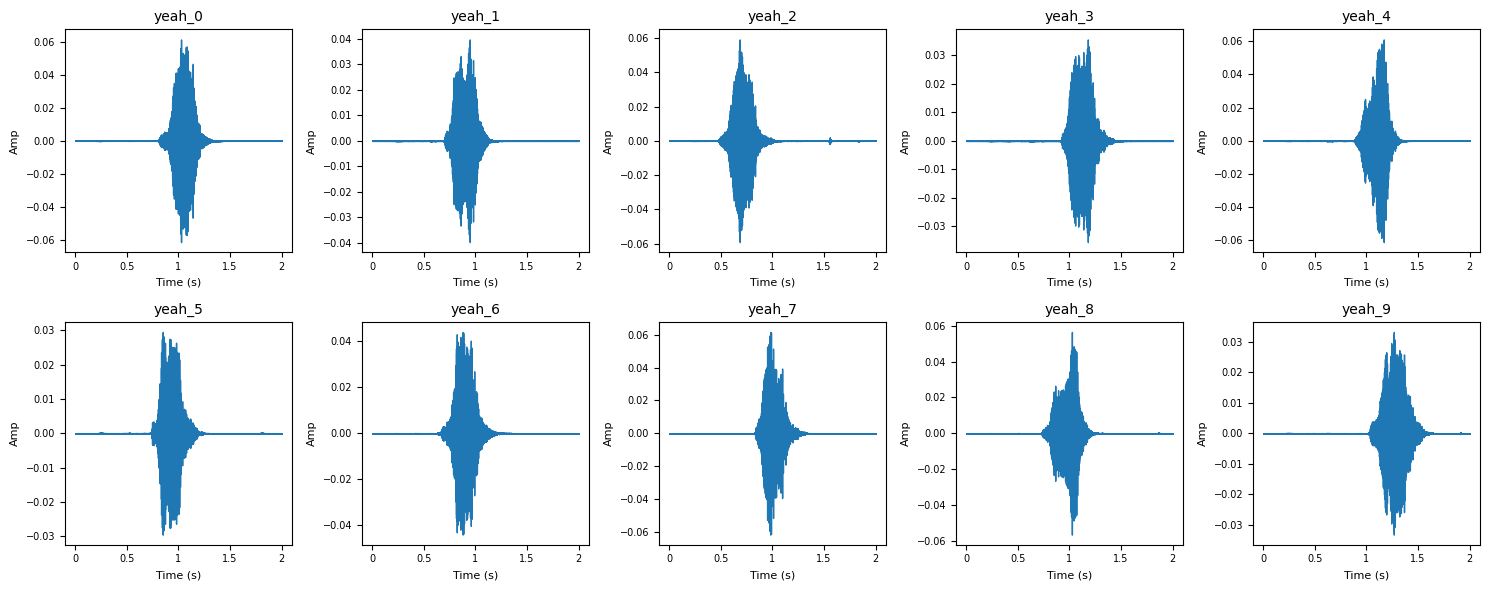

Processed 10 files, Sampling rate: 16000 Hz

522K0024
Found 10 'yeah' audio files


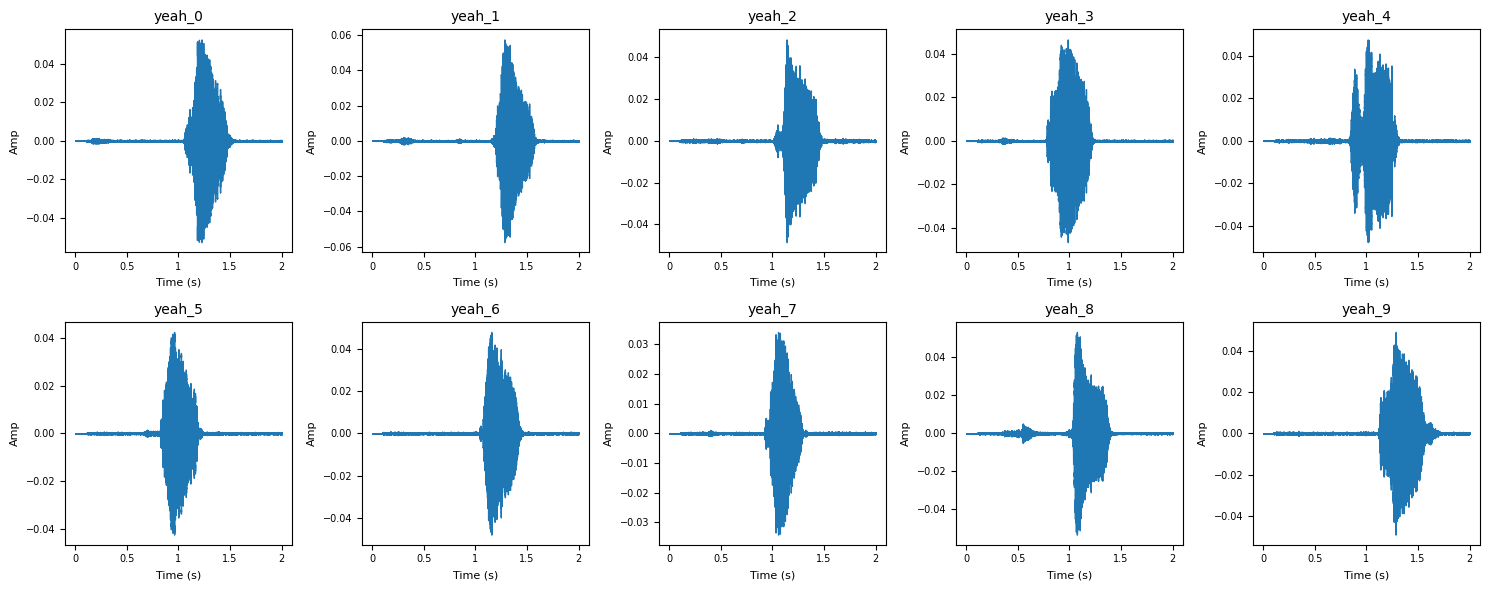

Processed 10 files, Sampling rate: 16000 Hz


In [18]:
yeah_signals, sr = visualize_audio_files("yeah")

## here


522K0021
Found 10 'here' audio files


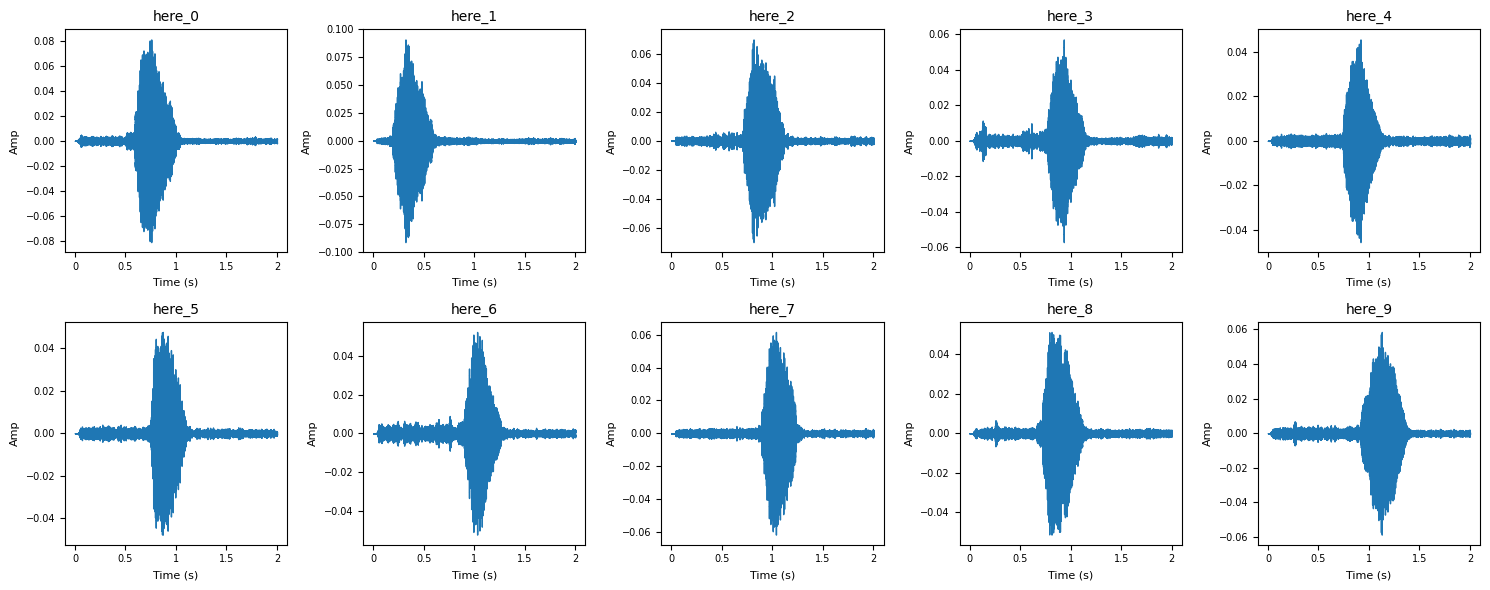

Processed 10 files, Sampling rate: 16000 Hz

522K0037
Found 10 'here' audio files


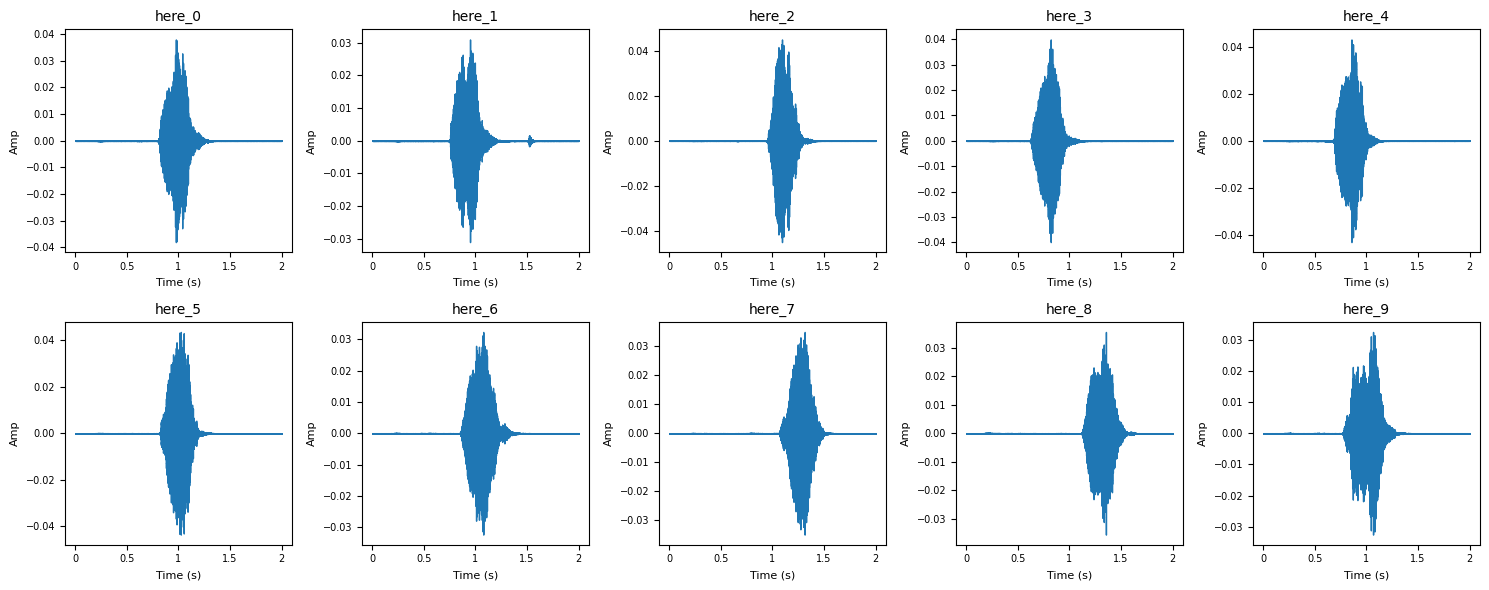

Processed 10 files, Sampling rate: 16000 Hz

522K0024
Found 10 'here' audio files


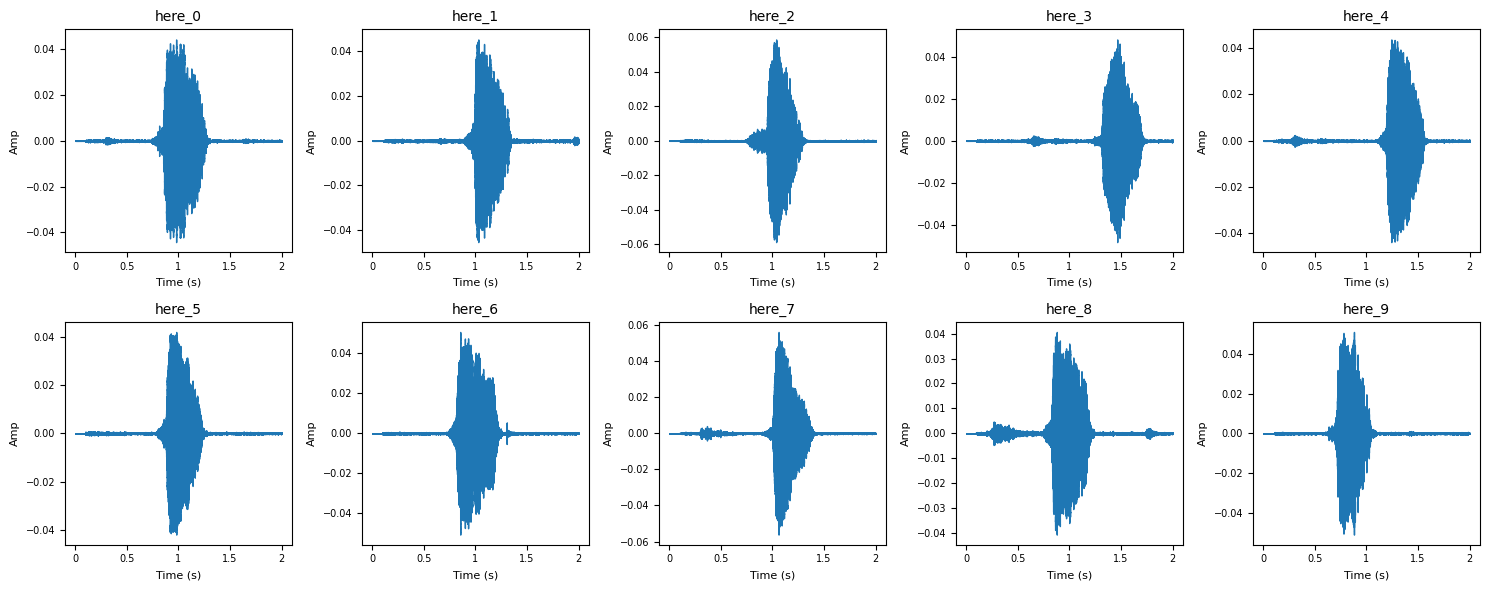

Processed 10 files, Sampling rate: 16000 Hz


In [19]:
here_signals, sr = visualize_audio_files("here")

## present


522K0021
Found 10 'present' audio files


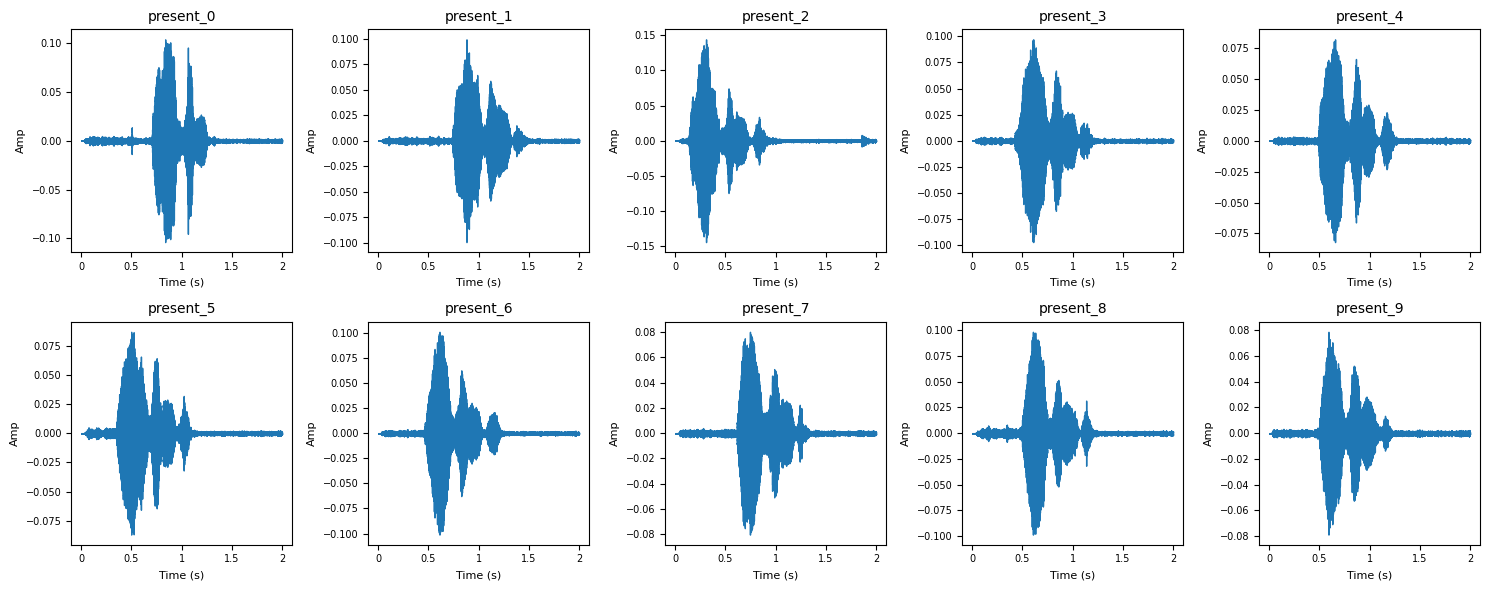

Processed 10 files, Sampling rate: 16000 Hz

522K0037
Found 10 'present' audio files


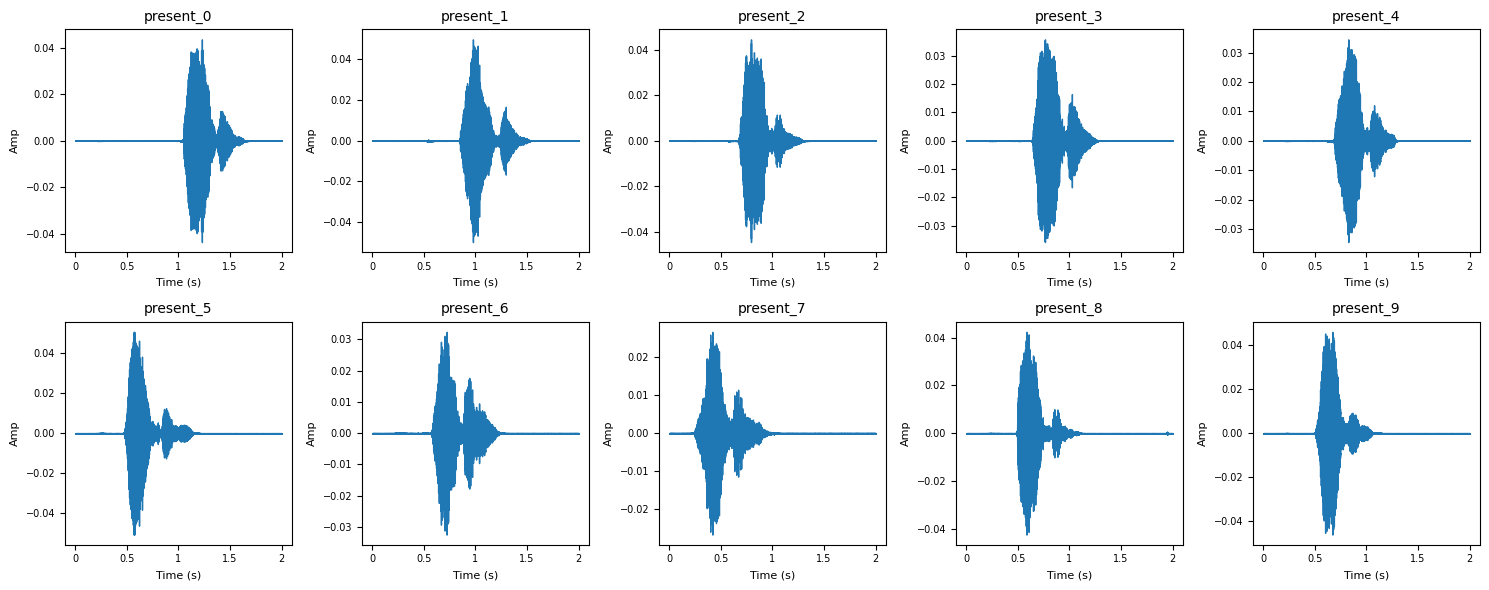

Processed 10 files, Sampling rate: 16000 Hz

522K0024
Found 10 'present' audio files


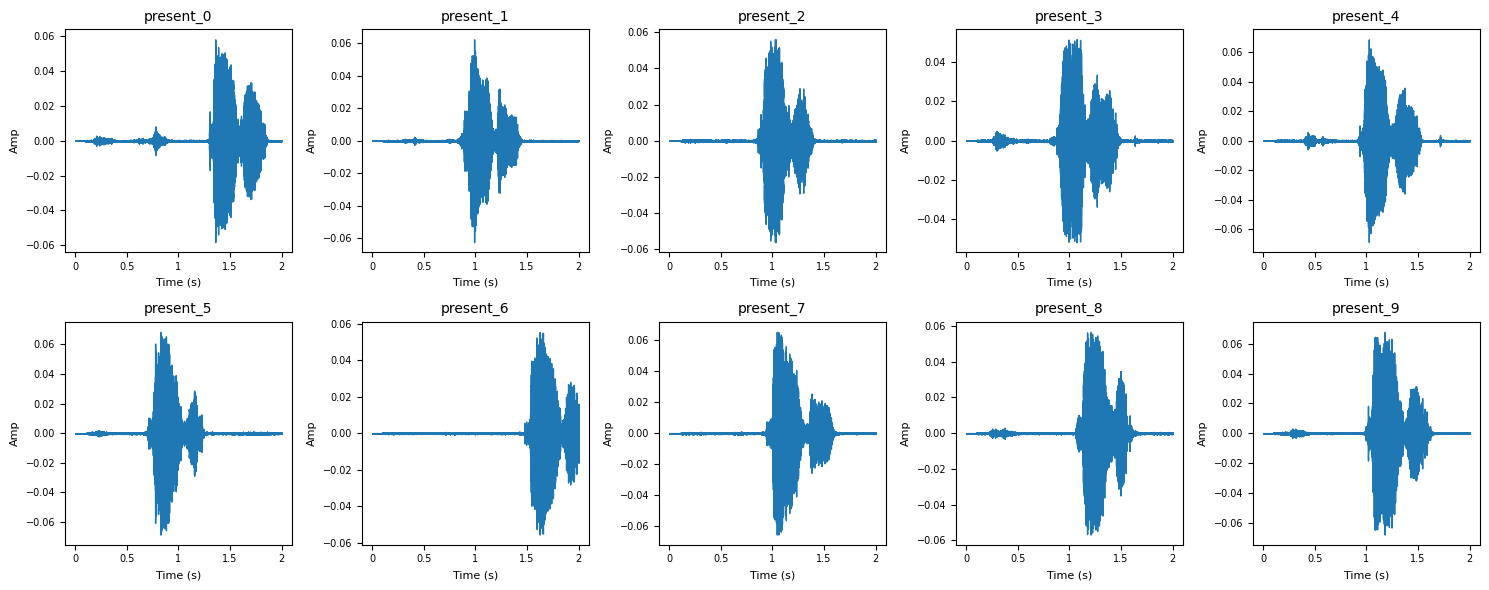

Processed 10 files, Sampling rate: 16000 Hz


In [20]:
present_signals, sr = visualize_audio_files("present")

In [ ]:
frame_length = int(0.03 * sr)
hop_length = int(0.01 * sr)

frames = librosa.util.frame(signal, frame_length=frame_length, hop_length=hop_length)
print("Number of frames:", frames.shape[1])
print("Frame length:", frames.shape[0])

Number of frames: 198
Frame length: 480
